In [1]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet")
import dense_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'dense_unet_50ep_512_aG_wo_slice'
INPUT_SHAPE = (512, 512, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-02-15 03:33:31.830410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 03:33:31.830434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 03:33:31.831489: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 03:33:31.836909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-15 03:33:32.417966: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}


# Create augmentation
train_preproc = preprocess.build_augmentation_for_adaptive()
test_preproc = preprocess.build_augmentation_for_adaptive(is_train=False)

# Create train, test generator
train_generator = data_generator.AdaptiveDataGenerator(
    TRAIN_SOURCE,
    number_of_images=2,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    is_test=False,
    slice_black=False,
    augmentation= train_preproc
)

test_generator = data_generator.AdaptiveDataGenerator(
    TRAIN_SOURCE,
    number_of_images=2,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

# Create model
model = dense_unet.build_model(input_shape=INPUT_SHAPE)
model.summary()

2024-02-15 01:37:19.466497: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 01:37:19.502284: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 01:37:19.502496: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 48)         480       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 512, 512, 48)         192       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 512, 512, 48)         0         ['batch_normalization[0][0

In [3]:
train.model_train(model,
                  epoch = 50,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=True)


Epoch 00001: WeightDecayScheduler setting learning rate to 9.999899747381279e-05.
Epoch 1/50


2024-02-14 20:12:25.217041: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-14 20:12:27.466476: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fecdf8c03a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-14 20:12:27.466499: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-02-14 20:12:27.469961: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1707941547.538118  696463 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


540/540 [==============================] - ETA: 0s - loss: 0.4256 - sensitivity: 0.5851 - specificity: 0.9519 - accuracy: 0.9279INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/1--0.4256-0.5851-0.9519-0.4852-0.3591-0.9890.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/1--0.4256-0.5851-0.9519-0.4852-0.3591-0.9890.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/1--0.4256-0.5851-0.9519-0.4852-0.3591-0.9890.pb
540/540 [==============================] - 257s 455ms/step - loss: 0.4256 - sensitivity: 0.5851 - specificity: 0.9519 - accuracy: 0.9279 - val_loss: 0.4852 - val_sensitivity: 0.3591 - val_specificity: 0.9890 - val_accuracy: 0.9489

Epoch 00002: WeightDecayScheduler setting learning rate to 9.99980006775877e-05.
Epoch 2/50
540/540 [==============================] - ETA: 0s - loss: 0.3326 - sensitivity: 0.6389 - specificity: 0.9741 - accuracy: 0.9521INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/2--0.3326-0.6389-0.9741-0.3567-0.5781-0.9765.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/2--0.3326-0.6389-0.9741-0.3567-0.5781-0.9765.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/2--0.3326-0.6389-0.9741-0.3567-0.5781-0.9765.pb
540/540 [==============================] - 244s 453ms/step - loss: 0.3326 - sensitivity: 0.6389 - specificity: 0.9741 - accuracy: 0.9521 - val_loss: 0.3567 - val_sensitivity: 0.5781 - val_specificity: 0.9765 - val_accuracy: 0.9529

Epoch 00003: WeightDecayScheduler setting learning rate to 9.999700388136262e-05.
Epoch 3/50
540/540 [==============================] - ETA: 0s - loss: 0.3093 - sensitivity: 0.6635 - specificity: 0.9770 - accuracy: 0.9567INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/3--0.3093-0.6635-0.9770-0.3364-0.5386-0.9873.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/3--0.3093-0.6635-0.9770-0.3364-0.5386-0.9873.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/3--0.3093-0.6635-0.9770-0.3364-0.5386-0.9873.pb
540/540 [==============================] - 240s 444ms/step - loss: 0.3093 - sensitivity: 0.6635 - specificity: 0.9770 - accuracy: 0.9567 - val_loss: 0.3364 - val_sensitivity: 0.5386 - val_specificity: 0.9873 - val_accuracy: 0.9590

Epoch 00004: WeightDecayScheduler setting learning rate to 9.999600708513754e-05.
Epoch 4/50
540/540 [==============================] - ETA: 0s - loss: 0.2874 - sensitivity: 0.6822 - specificity: 0.9765 - accuracy: 0.9569INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/4--0.2874-0.6822-0.9765-0.3018-0.6514-0.9763.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/4--0.2874-0.6822-0.9765-0.3018-0.6514-0.9763.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/4--0.2874-0.6822-0.9765-0.3018-0.6514-0.9763.pb
540/540 [==============================] - 238s 441ms/step - loss: 0.2874 - sensitivity: 0.6822 - specificity: 0.9765 - accuracy: 0.9569 - val_loss: 0.3018 - val_sensitivity: 0.6514 - val_specificity: 0.9763 - val_accuracy: 0.9569

Epoch 00005: WeightDecayScheduler setting learning rate to 9.999501028891246e-05.
Epoch 5/50
540/540 [==============================] - ETA: 0s - loss: 0.2843 - sensitivity: 0.6801 - specificity: 0.9790 - accuracy: 0.9601INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/5--0.2843-0.6801-0.9790-0.2944-0.6807-0.9741.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/5--0.2843-0.6801-0.9790-0.2944-0.6807-0.9741.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/5--0.2843-0.6801-0.9790-0.2944-0.6807-0.9741.pb
540/540 [==============================] - 238s 441ms/step - loss: 0.2843 - sensitivity: 0.6801 - specificity: 0.9790 - accuracy: 0.9601 - val_loss: 0.2944 - val_sensitivity: 0.6807 - val_specificity: 0.9741 - val_accuracy: 0.9568

Epoch 00006: WeightDecayScheduler setting learning rate to 9.999401349268737e-05.
Epoch 6/50
540/540 [==============================] - ETA: 0s - loss: 0.2682 - sensitivity: 0.6950 - specificity: 0.9796 - accuracy: 0.9614INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/6--0.2682-0.6950-0.9796-0.2950-0.6131-0.9847.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/6--0.2682-0.6950-0.9796-0.2950-0.6131-0.9847.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/6--0.2682-0.6950-0.9796-0.2950-0.6131-0.9847.pb
540/540 [==============================] - 239s 443ms/step - loss: 0.2682 - sensitivity: 0.6950 - specificity: 0.9796 - accuracy: 0.9614 - val_loss: 0.2950 - val_sensitivity: 0.6131 - val_specificity: 0.9847 - val_accuracy: 0.9629

Epoch 00007: WeightDecayScheduler setting learning rate to 9.999301669646229e-05.
Epoch 7/50
540/540 [==============================] - ETA: 0s - loss: 0.2724 - sensitivity: 0.6908 - specificity: 0.9797 - accuracy: 0.9616INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/7--0.2724-0.6908-0.9797-0.2824-0.7089-0.9728.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/7--0.2724-0.6908-0.9797-0.2824-0.7089-0.9728.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/7--0.2724-0.6908-0.9797-0.2824-0.7089-0.9728.pb
540/540 [==============================] - 244s 452ms/step - loss: 0.2724 - sensitivity: 0.6908 - specificity: 0.9797 - accuracy: 0.9616 - val_loss: 0.2824 - val_sensitivity: 0.7089 - val_specificity: 0.9728 - val_accuracy: 0.9579

Epoch 00008: WeightDecayScheduler setting learning rate to 9.999201990023722e-05.
Epoch 8/50
540/540 [==============================] - ETA: 0s - loss: 0.2665 - sensitivity: 0.6972 - specificity: 0.9796 - accuracy: 0.9611INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/8--0.2665-0.6972-0.9796-0.2963-0.7245-0.9682.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/8--0.2665-0.6972-0.9796-0.2963-0.7245-0.9682.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/8--0.2665-0.6972-0.9796-0.2963-0.7245-0.9682.pb
540/540 [==============================] - 231s 429ms/step - loss: 0.2665 - sensitivity: 0.6972 - specificity: 0.9796 - accuracy: 0.9611 - val_loss: 0.2963 - val_sensitivity: 0.7245 - val_specificity: 0.9682 - val_accuracy: 0.9549

Epoch 00009: WeightDecayScheduler setting learning rate to 9.999102310401214e-05.
Epoch 9/50
540/540 [==============================] - ETA: 0s - loss: 0.2685 - sensitivity: 0.6880 - specificity: 0.9808 - accuracy: 0.9625INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/9--0.2685-0.6880-0.9808-0.2806-0.6910-0.9751.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/9--0.2685-0.6880-0.9808-0.2806-0.6910-0.9751.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/9--0.2685-0.6880-0.9808-0.2806-0.6910-0.9751.pb
540/540 [==============================] - 247s 457ms/step - loss: 0.2685 - sensitivity: 0.6880 - specificity: 0.9808 - accuracy: 0.9625 - val_loss: 0.2806 - val_sensitivity: 0.6910 - val_specificity: 0.9751 - val_accuracy: 0.9577

Epoch 00010: WeightDecayScheduler setting learning rate to 9.999002630778705e-05.
Epoch 10/50
540/540 [==============================] - ETA: 0s - loss: 0.2570 - sensitivity: 0.7002 - specificity: 0.9813 - accuracy: 0.9637INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/10--0.2570-0.7002-0.9813-0.2956-0.6338-0.9819.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/10--0.2570-0.7002-0.9813-0.2956-0.6338-0.9819.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/10--0.2570-0.7002-0.9813-0.2956-0.6338-0.9819.pb
540/540 [==============================] - 241s 447ms/step - loss: 0.2570 - sensitivity: 0.7002 - specificity: 0.9813 - accuracy: 0.9637 - val_loss: 0.2956 - val_sensitivity: 0.6338 - val_specificity: 0.9819 - val_accuracy: 0.9623

Epoch 00011: WeightDecayScheduler setting learning rate to 9.998902951156197e-05.
Epoch 11/50
540/540 [==============================] - ETA: 0s - loss: 0.2553 - sensitivity: 0.7020 - specificity: 0.9815 - accuracy: 0.9642INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/11--0.2553-0.7020-0.9815-0.2818-0.7197-0.9724.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/11--0.2553-0.7020-0.9815-0.2818-0.7197-0.9724.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/11--0.2553-0.7020-0.9815-0.2818-0.7197-0.9724.pb
540/540 [==============================] - 247s 457ms/step - loss: 0.2553 - sensitivity: 0.7020 - specificity: 0.9815 - accuracy: 0.9642 - val_loss: 0.2818 - val_sensitivity: 0.7197 - val_specificity: 0.9724 - val_accuracy: 0.9586

Epoch 00012: WeightDecayScheduler setting learning rate to 9.998803271533689e-05.
Epoch 12/50
540/540 [==============================] - ETA: 0s - loss: 0.2567 - sensitivity: 0.7036 - specificity: 0.9813 - accuracy: 0.9640INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/12--0.2567-0.7036-0.9813-0.2662-0.6714-0.9822.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/12--0.2567-0.7036-0.9813-0.2662-0.6714-0.9822.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/12--0.2567-0.7036-0.9813-0.2662-0.6714-0.9822.pb
540/540 [==============================] - 242s 449ms/step - loss: 0.2567 - sensitivity: 0.7036 - specificity: 0.9813 - accuracy: 0.9640 - val_loss: 0.2662 - val_sensitivity: 0.6714 - val_specificity: 0.9822 - val_accuracy: 0.9633

Epoch 00013: WeightDecayScheduler setting learning rate to 9.99870359191118e-05.
Epoch 13/50
540/540 [==============================] - ETA: 0s - loss: 0.2489 - sensitivity: 0.7082 - specificity: 0.9822 - accuracy: 0.9648INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/13--0.2489-0.7082-0.9822-0.2704-0.7171-0.9745.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/13--0.2489-0.7082-0.9822-0.2704-0.7171-0.9745.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/13--0.2489-0.7082-0.9822-0.2704-0.7171-0.9745.pb
540/540 [==============================] - 244s 453ms/step - loss: 0.2489 - sensitivity: 0.7082 - specificity: 0.9822 - accuracy: 0.9648 - val_loss: 0.2704 - val_sensitivity: 0.7171 - val_specificity: 0.9745 - val_accuracy: 0.9595

Epoch 00014: WeightDecayScheduler setting learning rate to 9.998603912288672e-05.
Epoch 14/50
540/540 [==============================] - ETA: 0s - loss: 0.2541 - sensitivity: 0.7043 - specificity: 0.9824 - accuracy: 0.9652INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/14--0.2541-0.7043-0.9824-0.2737-0.7079-0.9742.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/14--0.2541-0.7043-0.9824-0.2737-0.7079-0.9742.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/14--0.2541-0.7043-0.9824-0.2737-0.7079-0.9742.pb
540/540 [==============================] - 237s 438ms/step - loss: 0.2541 - sensitivity: 0.7043 - specificity: 0.9824 - accuracy: 0.9652 - val_loss: 0.2737 - val_sensitivity: 0.7079 - val_specificity: 0.9742 - val_accuracy: 0.9592

Epoch 00015: WeightDecayScheduler setting learning rate to 9.998504232666165e-05.
Epoch 15/50
540/540 [==============================] - ETA: 0s - loss: 0.2458 - sensitivity: 0.7125 - specificity: 0.9820 - accuracy: 0.9650INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/15--0.2458-0.7125-0.9820-0.2633-0.6986-0.9784.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/15--0.2458-0.7125-0.9820-0.2633-0.6986-0.9784.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/15--0.2458-0.7125-0.9820-0.2633-0.6986-0.9784.pb
540/540 [==============================] - 239s 444ms/step - loss: 0.2458 - sensitivity: 0.7125 - specificity: 0.9820 - accuracy: 0.9650 - val_loss: 0.2633 - val_sensitivity: 0.6986 - val_specificity: 0.9784 - val_accuracy: 0.9622

Epoch 00016: WeightDecayScheduler setting learning rate to 9.998404553043657e-05.
Epoch 16/50
540/540 [==============================] - ETA: 0s - loss: 0.2452 - sensitivity: 0.7109 - specificity: 0.9818 - accuracy: 0.9652INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/16--0.2452-0.7109-0.9818-0.2646-0.7249-0.9738.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/16--0.2452-0.7109-0.9818-0.2646-0.7249-0.9738.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/16--0.2452-0.7109-0.9818-0.2646-0.7249-0.9738.pb
540/540 [==============================] - 242s 447ms/step - loss: 0.2452 - sensitivity: 0.7109 - specificity: 0.9818 - accuracy: 0.9652 - val_loss: 0.2646 - val_sensitivity: 0.7249 - val_specificity: 0.9738 - val_accuracy: 0.9595

Epoch 00017: WeightDecayScheduler setting learning rate to 9.998304873421149e-05.
Epoch 17/50
540/540 [==============================] - ETA: 0s - loss: 0.2546 - sensitivity: 0.6994 - specificity: 0.9832 - accuracy: 0.9667INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/17--0.2546-0.6994-0.9832-0.2746-0.6855-0.9794.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/17--0.2546-0.6994-0.9832-0.2746-0.6855-0.9794.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/17--0.2546-0.6994-0.9832-0.2746-0.6855-0.9794.pb
540/540 [==============================] - 243s 451ms/step - loss: 0.2546 - sensitivity: 0.6994 - specificity: 0.9832 - accuracy: 0.9667 - val_loss: 0.2746 - val_sensitivity: 0.6855 - val_specificity: 0.9794 - val_accuracy: 0.9629

Epoch 00018: WeightDecayScheduler setting learning rate to 9.99820519379864e-05.
Epoch 18/50
540/540 [==============================] - ETA: 0s - loss: 0.2370 - sensitivity: 0.7158 - specificity: 0.9839 - accuracy: 0.9677INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/18--0.2370-0.7158-0.9839-0.2694-0.6820-0.9799.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/18--0.2370-0.7158-0.9839-0.2694-0.6820-0.9799.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/18--0.2370-0.7158-0.9839-0.2694-0.6820-0.9799.pb
540/540 [==============================] - 236s 438ms/step - loss: 0.2370 - sensitivity: 0.7158 - specificity: 0.9839 - accuracy: 0.9677 - val_loss: 0.2694 - val_sensitivity: 0.6820 - val_specificity: 0.9799 - val_accuracy: 0.9629

Epoch 00019: WeightDecayScheduler setting learning rate to 9.998105514176132e-05.
Epoch 19/50
540/540 [==============================] - ETA: 0s - loss: 0.2509 - sensitivity: 0.7016 - specificity: 0.9825 - accuracy: 0.9655INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/19--0.2509-0.7016-0.9825-0.2583-0.6848-0.9824.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/19--0.2509-0.7016-0.9825-0.2583-0.6848-0.9824.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/19--0.2509-0.7016-0.9825-0.2583-0.6848-0.9824.pb
540/540 [==============================] - 240s 444ms/step - loss: 0.2509 - sensitivity: 0.7016 - specificity: 0.9825 - accuracy: 0.9655 - val_loss: 0.2583 - val_sensitivity: 0.6848 - val_specificity: 0.9824 - val_accuracy: 0.9654

Epoch 00020: WeightDecayScheduler setting learning rate to 9.998005834553624e-05.
Epoch 20/50
540/540 [==============================] - ETA: 0s - loss: 0.2458 - sensitivity: 0.7079 - specificity: 0.9823 - accuracy: 0.9654INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/20--0.2458-0.7079-0.9823-0.2665-0.6555-0.9839.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/20--0.2458-0.7079-0.9823-0.2665-0.6555-0.9839.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/20--0.2458-0.7079-0.9823-0.2665-0.6555-0.9839.pb
540/540 [==============================] - 244s 453ms/step - loss: 0.2458 - sensitivity: 0.7079 - specificity: 0.9823 - accuracy: 0.9654 - val_loss: 0.2665 - val_sensitivity: 0.6555 - val_specificity: 0.9839 - val_accuracy: 0.9644

Epoch 00021: WeightDecayScheduler setting learning rate to 9.997906154931117e-05.
Epoch 21/50
540/540 [==============================] - ETA: 0s - loss: 0.2363 - sensitivity: 0.7176 - specificity: 0.9830 - accuracy: 0.9670INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/21--0.2363-0.7176-0.9830-0.2620-0.6788-0.9812.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/21--0.2363-0.7176-0.9830-0.2620-0.6788-0.9812.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/21--0.2363-0.7176-0.9830-0.2620-0.6788-0.9812.pb
540/540 [==============================] - 240s 445ms/step - loss: 0.2363 - sensitivity: 0.7176 - specificity: 0.9830 - accuracy: 0.9670 - val_loss: 0.2620 - val_sensitivity: 0.6788 - val_specificity: 0.9812 - val_accuracy: 0.9637

Epoch 00022: WeightDecayScheduler setting learning rate to 9.997806475308608e-05.
Epoch 22/50
540/540 [==============================] - ETA: 0s - loss: 0.2418 - sensitivity: 0.7131 - specificity: 0.9822 - accuracy: 0.9656INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/22--0.2418-0.7131-0.9822-0.2644-0.6689-0.9840.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/22--0.2418-0.7131-0.9822-0.2644-0.6689-0.9840.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/22--0.2418-0.7131-0.9822-0.2644-0.6689-0.9840.pb
540/540 [==============================] - 229s 425ms/step - loss: 0.2418 - sensitivity: 0.7131 - specificity: 0.9822 - accuracy: 0.9656 - val_loss: 0.2644 - val_sensitivity: 0.6689 - val_specificity: 0.9840 - val_accuracy: 0.9658

Epoch 00023: WeightDecayScheduler setting learning rate to 9.9977067956861e-05.
Epoch 23/50
540/540 [==============================] - ETA: 0s - loss: 0.2331 - sensitivity: 0.7187 - specificity: 0.9837 - accuracy: 0.9677INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/23--0.2331-0.7187-0.9837-0.2546-0.7299-0.9769.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/23--0.2331-0.7187-0.9837-0.2546-0.7299-0.9769.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/23--0.2331-0.7187-0.9837-0.2546-0.7299-0.9769.pb
540/540 [==============================] - 246s 455ms/step - loss: 0.2331 - sensitivity: 0.7187 - specificity: 0.9837 - accuracy: 0.9677 - val_loss: 0.2546 - val_sensitivity: 0.7299 - val_specificity: 0.9769 - val_accuracy: 0.9627

Epoch 00024: WeightDecayScheduler setting learning rate to 9.997607116063592e-05.
Epoch 24/50
540/540 [==============================] - ETA: 0s - loss: 0.2362 - sensitivity: 0.7170 - specificity: 0.9834 - accuracy: 0.9674INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/24--0.2362-0.7170-0.9834-0.2597-0.6743-0.9839.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/24--0.2362-0.7170-0.9834-0.2597-0.6743-0.9839.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/24--0.2362-0.7170-0.9834-0.2597-0.6743-0.9839.pb
540/540 [==============================] - 244s 452ms/step - loss: 0.2362 - sensitivity: 0.7170 - specificity: 0.9834 - accuracy: 0.9674 - val_loss: 0.2597 - val_sensitivity: 0.6743 - val_specificity: 0.9839 - val_accuracy: 0.9659

Epoch 00025: WeightDecayScheduler setting learning rate to 9.997507436441083e-05.
Epoch 25/50
540/540 [==============================] - ETA: 0s - loss: 0.2345 - sensitivity: 0.7184 - specificity: 0.9837 - accuracy: 0.9675INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/25--0.2345-0.7184-0.9837-0.2612-0.6849-0.9819.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/25--0.2345-0.7184-0.9837-0.2612-0.6849-0.9819.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/25--0.2345-0.7184-0.9837-0.2612-0.6849-0.9819.pb
540/540 [==============================] - 244s 452ms/step - loss: 0.2345 - sensitivity: 0.7184 - specificity: 0.9837 - accuracy: 0.9675 - val_loss: 0.2612 - val_sensitivity: 0.6849 - val_specificity: 0.9819 - val_accuracy: 0.9654

Epoch 00026: WeightDecayScheduler setting learning rate to 9.997407756818575e-05.
Epoch 26/50
540/540 [==============================] - ETA: 0s - loss: 0.2285 - sensitivity: 0.7234 - specificity: 0.9832 - accuracy: 0.9672INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/26--0.2285-0.7234-0.9832-0.2562-0.6692-0.9843.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/26--0.2285-0.7234-0.9832-0.2562-0.6692-0.9843.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/26--0.2285-0.7234-0.9832-0.2562-0.6692-0.9843.pb
540/540 [==============================] - 246s 456ms/step - loss: 0.2285 - sensitivity: 0.7234 - specificity: 0.9832 - accuracy: 0.9672 - val_loss: 0.2562 - val_sensitivity: 0.6692 - val_specificity: 0.9843 - val_accuracy: 0.9661

Epoch 00027: WeightDecayScheduler setting learning rate to 9.997308077196067e-05.
Epoch 27/50
540/540 [==============================] - ETA: 0s - loss: 0.2322 - sensitivity: 0.7221 - specificity: 0.9833 - accuracy: 0.9675INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/27--0.2322-0.7221-0.9833-0.2401-0.6903-0.9845.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/27--0.2322-0.7221-0.9833-0.2401-0.6903-0.9845.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/27--0.2322-0.7221-0.9833-0.2401-0.6903-0.9845.pb
540/540 [==============================] - 235s 435ms/step - loss: 0.2322 - sensitivity: 0.7221 - specificity: 0.9833 - accuracy: 0.9675 - val_loss: 0.2401 - val_sensitivity: 0.6903 - val_specificity: 0.9845 - val_accuracy: 0.9667

Epoch 00028: WeightDecayScheduler setting learning rate to 9.99720839757356e-05.
Epoch 28/50
540/540 [==============================] - ETA: 0s - loss: 0.2270 - sensitivity: 0.7290 - specificity: 0.9836 - accuracy: 0.9684INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/28--0.2270-0.7290-0.9836-0.2613-0.6644-0.9835.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/28--0.2270-0.7290-0.9836-0.2613-0.6644-0.9835.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/28--0.2270-0.7290-0.9836-0.2613-0.6644-0.9835.pb
540/540 [==============================] - 248s 459ms/step - loss: 0.2270 - sensitivity: 0.7290 - specificity: 0.9836 - accuracy: 0.9684 - val_loss: 0.2613 - val_sensitivity: 0.6644 - val_specificity: 0.9835 - val_accuracy: 0.9646

Epoch 00029: WeightDecayScheduler setting learning rate to 9.997108717951051e-05.
Epoch 29/50
540/540 [==============================] - ETA: 0s - loss: 0.2310 - sensitivity: 0.7207 - specificity: 0.9844 - accuracy: 0.9688INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/29--0.2310-0.7207-0.9844-0.2581-0.6908-0.9810.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/29--0.2310-0.7207-0.9844-0.2581-0.6908-0.9810.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/29--0.2310-0.7207-0.9844-0.2581-0.6908-0.9810.pb
540/540 [==============================] - 242s 448ms/step - loss: 0.2310 - sensitivity: 0.7207 - specificity: 0.9844 - accuracy: 0.9688 - val_loss: 0.2581 - val_sensitivity: 0.6908 - val_specificity: 0.9810 - val_accuracy: 0.9640

Epoch 00030: WeightDecayScheduler setting learning rate to 9.997009038328543e-05.
Epoch 30/50
540/540 [==============================] - ETA: 0s - loss: 0.2191 - sensitivity: 0.7337 - specificity: 0.9829 - accuracy: 0.9668INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/30--0.2191-0.7337-0.9829-0.2692-0.6525-0.9840.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/30--0.2191-0.7337-0.9829-0.2692-0.6525-0.9840.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/30--0.2191-0.7337-0.9829-0.2692-0.6525-0.9840.pb
540/540 [==============================] - 232s 430ms/step - loss: 0.2191 - sensitivity: 0.7337 - specificity: 0.9829 - accuracy: 0.9668 - val_loss: 0.2692 - val_sensitivity: 0.6525 - val_specificity: 0.9840 - val_accuracy: 0.9649

Epoch 00031: WeightDecayScheduler setting learning rate to 9.996909358706035e-05.
Epoch 31/50
540/540 [==============================] - ETA: 0s - loss: 0.2287 - sensitivity: 0.7242 - specificity: 0.9841 - accuracy: 0.9686INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/31--0.2287-0.7242-0.9841-0.2648-0.6775-0.9829.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/31--0.2287-0.7242-0.9841-0.2648-0.6775-0.9829.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/31--0.2287-0.7242-0.9841-0.2648-0.6775-0.9829.pb
540/540 [==============================] - 241s 447ms/step - loss: 0.2287 - sensitivity: 0.7242 - specificity: 0.9841 - accuracy: 0.9686 - val_loss: 0.2648 - val_sensitivity: 0.6775 - val_specificity: 0.9829 - val_accuracy: 0.9657

Epoch 00032: WeightDecayScheduler setting learning rate to 9.996809679083526e-05.
Epoch 32/50
540/540 [==============================] - ETA: 0s - loss: 0.2246 - sensitivity: 0.7297 - specificity: 0.9826 - accuracy: 0.9666INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/32--0.2246-0.7297-0.9826-0.2507-0.7366-0.9760.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/32--0.2246-0.7297-0.9826-0.2507-0.7366-0.9760.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/32--0.2246-0.7297-0.9826-0.2507-0.7366-0.9760.pb
540/540 [==============================] - 245s 455ms/step - loss: 0.2246 - sensitivity: 0.7297 - specificity: 0.9826 - accuracy: 0.9666 - val_loss: 0.2507 - val_sensitivity: 0.7366 - val_specificity: 0.9760 - val_accuracy: 0.9618

Epoch 00033: WeightDecayScheduler setting learning rate to 9.996709999461018e-05.
Epoch 33/50
540/540 [==============================] - ETA: 0s - loss: 0.2166 - sensitivity: 0.7376 - specificity: 0.9833 - accuracy: 0.9677INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/33--0.2166-0.7376-0.9833-0.2598-0.6624-0.9844.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/33--0.2166-0.7376-0.9833-0.2598-0.6624-0.9844.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/33--0.2166-0.7376-0.9833-0.2598-0.6624-0.9844.pb
540/540 [==============================] - 244s 452ms/step - loss: 0.2166 - sensitivity: 0.7376 - specificity: 0.9833 - accuracy: 0.9677 - val_loss: 0.2598 - val_sensitivity: 0.6624 - val_specificity: 0.9844 - val_accuracy: 0.9659

Epoch 00034: WeightDecayScheduler setting learning rate to 9.99661031983851e-05.
Epoch 34/50
540/540 [==============================] - ETA: 0s - loss: 0.2283 - sensitivity: 0.7254 - specificity: 0.9837 - accuracy: 0.9685INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/34--0.2283-0.7254-0.9837-0.2413-0.7342-0.9774.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/34--0.2283-0.7254-0.9837-0.2413-0.7342-0.9774.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/34--0.2283-0.7254-0.9837-0.2413-0.7342-0.9774.pb
540/540 [==============================] - 240s 444ms/step - loss: 0.2283 - sensitivity: 0.7254 - specificity: 0.9837 - accuracy: 0.9685 - val_loss: 0.2413 - val_sensitivity: 0.7342 - val_specificity: 0.9774 - val_accuracy: 0.9636

Epoch 00035: WeightDecayScheduler setting learning rate to 9.996510640216003e-05.
Epoch 35/50
540/540 [==============================] - ETA: 0s - loss: 0.2242 - sensitivity: 0.7265 - specificity: 0.9838 - accuracy: 0.9685INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/35--0.2242-0.7265-0.9838-0.2655-0.6377-0.9866.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/35--0.2242-0.7265-0.9838-0.2655-0.6377-0.9866.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/35--0.2242-0.7265-0.9838-0.2655-0.6377-0.9866.pb
540/540 [==============================] - 248s 459ms/step - loss: 0.2242 - sensitivity: 0.7265 - specificity: 0.9838 - accuracy: 0.9685 - val_loss: 0.2655 - val_sensitivity: 0.6377 - val_specificity: 0.9866 - val_accuracy: 0.9658

Epoch 00036: WeightDecayScheduler setting learning rate to 9.996410960593494e-05.
Epoch 36/50
540/540 [==============================] - ETA: 0s - loss: 0.2333 - sensitivity: 0.7199 - specificity: 0.9846 - accuracy: 0.9698INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/36--0.2333-0.7199-0.9846-0.2567-0.6582-0.9856.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/36--0.2333-0.7199-0.9846-0.2567-0.6582-0.9856.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/36--0.2333-0.7199-0.9846-0.2567-0.6582-0.9856.pb
540/540 [==============================] - 238s 441ms/step - loss: 0.2333 - sensitivity: 0.7199 - specificity: 0.9846 - accuracy: 0.9698 - val_loss: 0.2567 - val_sensitivity: 0.6582 - val_specificity: 0.9856 - val_accuracy: 0.9662

Epoch 00037: WeightDecayScheduler setting learning rate to 9.996311280970986e-05.
Epoch 37/50
540/540 [==============================] - ETA: 0s - loss: 0.2292 - sensitivity: 0.7218 - specificity: 0.9845 - accuracy: 0.9696INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/37--0.2292-0.7218-0.9845-0.2626-0.6562-0.9851.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/37--0.2292-0.7218-0.9845-0.2626-0.6562-0.9851.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/37--0.2292-0.7218-0.9845-0.2626-0.6562-0.9851.pb
540/540 [==============================] - 249s 461ms/step - loss: 0.2292 - sensitivity: 0.7218 - specificity: 0.9845 - accuracy: 0.9696 - val_loss: 0.2626 - val_sensitivity: 0.6562 - val_specificity: 0.9851 - val_accuracy: 0.9665

Epoch 00038: WeightDecayScheduler setting learning rate to 9.996211601348478e-05.
Epoch 38/50
540/540 [==============================] - ETA: 0s - loss: 0.2175 - sensitivity: 0.7320 - specificity: 0.9844 - accuracy: 0.9690INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/38--0.2175-0.7320-0.9844-0.2610-0.7240-0.9756.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/38--0.2175-0.7320-0.9844-0.2610-0.7240-0.9756.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/38--0.2175-0.7320-0.9844-0.2610-0.7240-0.9756.pb
540/540 [==============================] - 243s 451ms/step - loss: 0.2175 - sensitivity: 0.7320 - specificity: 0.9844 - accuracy: 0.9690 - val_loss: 0.2610 - val_sensitivity: 0.7240 - val_specificity: 0.9756 - val_accuracy: 0.9621

Epoch 00039: WeightDecayScheduler setting learning rate to 9.99611192172597e-05.
Epoch 39/50
540/540 [==============================] - ETA: 0s - loss: 0.2146 - sensitivity: 0.7388 - specificity: 0.9843 - accuracy: 0.9693INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/39--0.2146-0.7388-0.9843-0.2594-0.6949-0.9806.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/39--0.2146-0.7388-0.9843-0.2594-0.6949-0.9806.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/39--0.2146-0.7388-0.9843-0.2594-0.6949-0.9806.pb
540/540 [==============================] - 248s 459ms/step - loss: 0.2146 - sensitivity: 0.7388 - specificity: 0.9843 - accuracy: 0.9693 - val_loss: 0.2594 - val_sensitivity: 0.6949 - val_specificity: 0.9806 - val_accuracy: 0.9649

Epoch 00040: WeightDecayScheduler setting learning rate to 9.996012242103461e-05.
Epoch 40/50
540/540 [==============================] - ETA: 0s - loss: 0.2269 - sensitivity: 0.7257 - specificity: 0.9833 - accuracy: 0.9678INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/40--0.2269-0.7257-0.9833-0.2653-0.6479-0.9856.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/40--0.2269-0.7257-0.9833-0.2653-0.6479-0.9856.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/40--0.2269-0.7257-0.9833-0.2653-0.6479-0.9856.pb
540/540 [==============================] - 242s 447ms/step - loss: 0.2269 - sensitivity: 0.7257 - specificity: 0.9833 - accuracy: 0.9678 - val_loss: 0.2653 - val_sensitivity: 0.6479 - val_specificity: 0.9856 - val_accuracy: 0.9662

Epoch 00041: WeightDecayScheduler setting learning rate to 9.995912562480953e-05.
Epoch 41/50
540/540 [==============================] - ETA: 0s - loss: 0.2204 - sensitivity: 0.7310 - specificity: 0.9845 - accuracy: 0.9695INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/41--0.2204-0.7310-0.9845-0.2511-0.6978-0.9827.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/41--0.2204-0.7310-0.9845-0.2511-0.6978-0.9827.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/41--0.2204-0.7310-0.9845-0.2511-0.6978-0.9827.pb
540/540 [==============================] - 243s 450ms/step - loss: 0.2204 - sensitivity: 0.7310 - specificity: 0.9845 - accuracy: 0.9695 - val_loss: 0.2511 - val_sensitivity: 0.6978 - val_specificity: 0.9827 - val_accuracy: 0.9663

Epoch 00042: WeightDecayScheduler setting learning rate to 9.995812882858446e-05.
Epoch 42/50
540/540 [==============================] - ETA: 0s - loss: 0.2186 - sensitivity: 0.7324 - specificity: 0.9839 - accuracy: 0.9683INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/42--0.2186-0.7324-0.9839-0.2441-0.6743-0.9851.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/42--0.2186-0.7324-0.9839-0.2441-0.6743-0.9851.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/42--0.2186-0.7324-0.9839-0.2441-0.6743-0.9851.pb
540/540 [==============================] - 239s 442ms/step - loss: 0.2186 - sensitivity: 0.7324 - specificity: 0.9839 - accuracy: 0.9683 - val_loss: 0.2441 - val_sensitivity: 0.6743 - val_specificity: 0.9851 - val_accuracy: 0.9660

Epoch 00043: WeightDecayScheduler setting learning rate to 9.995713203235938e-05.
Epoch 43/50
540/540 [==============================] - ETA: 0s - loss: 0.2209 - sensitivity: 0.7290 - specificity: 0.9845 - accuracy: 0.9695INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/43--0.2209-0.7290-0.9845-0.2507-0.7184-0.9794.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/43--0.2209-0.7290-0.9845-0.2507-0.7184-0.9794.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/43--0.2209-0.7290-0.9845-0.2507-0.7184-0.9794.pb
540/540 [==============================] - 244s 452ms/step - loss: 0.2209 - sensitivity: 0.7290 - specificity: 0.9845 - accuracy: 0.9695 - val_loss: 0.2507 - val_sensitivity: 0.7184 - val_specificity: 0.9794 - val_accuracy: 0.9653

Epoch 00044: WeightDecayScheduler setting learning rate to 9.995613523613429e-05.
Epoch 44/50
540/540 [==============================] - ETA: 0s - loss: 0.2299 - sensitivity: 0.7231 - specificity: 0.9841 - accuracy: 0.9687INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/44--0.2299-0.7231-0.9841-0.2463-0.7201-0.9800.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/44--0.2299-0.7231-0.9841-0.2463-0.7201-0.9800.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/44--0.2299-0.7231-0.9841-0.2463-0.7201-0.9800.pb
540/540 [==============================] - 235s 435ms/step - loss: 0.2299 - sensitivity: 0.7231 - specificity: 0.9841 - accuracy: 0.9687 - val_loss: 0.2463 - val_sensitivity: 0.7201 - val_specificity: 0.9800 - val_accuracy: 0.9656

Epoch 00045: WeightDecayScheduler setting learning rate to 9.995513843990921e-05.
Epoch 45/50
540/540 [==============================] - ETA: 0s - loss: 0.2202 - sensitivity: 0.7331 - specificity: 0.9844 - accuracy: 0.9695INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/45--0.2202-0.7331-0.9844-0.2450-0.7061-0.9830.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/45--0.2202-0.7331-0.9844-0.2450-0.7061-0.9830.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/45--0.2202-0.7331-0.9844-0.2450-0.7061-0.9830.pb
540/540 [==============================] - 232s 430ms/step - loss: 0.2202 - sensitivity: 0.7331 - specificity: 0.9844 - accuracy: 0.9695 - val_loss: 0.2450 - val_sensitivity: 0.7061 - val_specificity: 0.9830 - val_accuracy: 0.9679

Epoch 00046: WeightDecayScheduler setting learning rate to 9.995414164368413e-05.
Epoch 46/50
540/540 [==============================] - ETA: 0s - loss: 0.2261 - sensitivity: 0.7243 - specificity: 0.9847 - accuracy: 0.9697INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/46--0.2261-0.7243-0.9847-0.2509-0.6870-0.9818.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/46--0.2261-0.7243-0.9847-0.2509-0.6870-0.9818.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/46--0.2261-0.7243-0.9847-0.2509-0.6870-0.9818.pb
540/540 [==============================] - 244s 452ms/step - loss: 0.2261 - sensitivity: 0.7243 - specificity: 0.9847 - accuracy: 0.9697 - val_loss: 0.2509 - val_sensitivity: 0.6870 - val_specificity: 0.9818 - val_accuracy: 0.9643

Epoch 00047: WeightDecayScheduler setting learning rate to 9.995314484745904e-05.
Epoch 47/50
540/540 [==============================] - ETA: 0s - loss: 0.2172 - sensitivity: 0.7291 - specificity: 0.9843 - accuracy: 0.9688INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/47--0.2172-0.7291-0.9843-0.2457-0.7413-0.9785.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/47--0.2172-0.7291-0.9843-0.2457-0.7413-0.9785.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/47--0.2172-0.7291-0.9843-0.2457-0.7413-0.9785.pb
540/540 [==============================] - 247s 457ms/step - loss: 0.2172 - sensitivity: 0.7291 - specificity: 0.9843 - accuracy: 0.9688 - val_loss: 0.2457 - val_sensitivity: 0.7413 - val_specificity: 0.9785 - val_accuracy: 0.9651

Epoch 00048: WeightDecayScheduler setting learning rate to 9.995214805123397e-05.
Epoch 48/50
540/540 [==============================] - ETA: 0s - loss: 0.2171 - sensitivity: 0.7353 - specificity: 0.9838 - accuracy: 0.9685INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/48--0.2171-0.7353-0.9838-0.2347-0.7458-0.9778.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/48--0.2171-0.7353-0.9838-0.2347-0.7458-0.9778.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/48--0.2171-0.7353-0.9838-0.2347-0.7458-0.9778.pb
540/540 [==============================] - 246s 456ms/step - loss: 0.2171 - sensitivity: 0.7353 - specificity: 0.9838 - accuracy: 0.9685 - val_loss: 0.2347 - val_sensitivity: 0.7458 - val_specificity: 0.9778 - val_accuracy: 0.9644

Epoch 00049: WeightDecayScheduler setting learning rate to 9.995115125500889e-05.
Epoch 49/50
540/540 [==============================] - ETA: 0s - loss: 0.2231 - sensitivity: 0.7258 - specificity: 0.9842 - accuracy: 0.9689INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/49--0.2231-0.7258-0.9842-0.2606-0.6528-0.9858.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/49--0.2231-0.7258-0.9842-0.2606-0.6528-0.9858.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/49--0.2231-0.7258-0.9842-0.2606-0.6528-0.9858.pb
540/540 [==============================] - 240s 445ms/step - loss: 0.2231 - sensitivity: 0.7258 - specificity: 0.9842 - accuracy: 0.9689 - val_loss: 0.2606 - val_sensitivity: 0.6528 - val_specificity: 0.9858 - val_accuracy: 0.9673

Epoch 00050: WeightDecayScheduler setting learning rate to 9.99501544587838e-05.
Epoch 50/50
540/540 [==============================] - ETA: 0s - loss: 0.2225 - sensitivity: 0.7245 - specificity: 0.9849 - accuracy: 0.9699INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/50--0.2225-0.7245-0.9849-0.2489-0.6857-0.9844.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/50--0.2225-0.7245-0.9849-0.2489-0.6857-0.9844.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf/50--0.2225-0.7245-0.9849-0.2489-0.6857-0.9844.pb
540/540 [==============================] - 243s 450ms/step - loss: 0.2225 - sensitivity: 0.7245 - specificity: 0.9849 - accuracy: 0.9699 - val_loss: 0.2489 - val_sensitivity: 0.6857 - val_specificity: 0.9844 - val_accuracy: 0.9676


In [3]:
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'f1_score' : metrics.f1_score,
                  'iou' : metrics.iou}

model_param_path = '/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_512_aG_wo_slice.tf'

test_preproc = preprocess.build_augmentation_for_adaptive(is_train=False)
test_generator = data_generator.AdaptiveDataGenerator(
    TEST_SOURCE,
    number_of_images=4,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

loss, sen, spe, acc, f1, iou = metrics.retrive_all_evaluation_of_test_dataset(test_generator, model_param_path, custom_objects)

1번째 epoch 결과


2024-02-15 03:34:54.576238: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 03:34:54.610996: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 03:34:54.611209: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

2024-02-15 03:34:57.315541: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


59/59 [==============================] - 22s 319ms/step - loss: 0.4044 - sensitivity: 0.4447 - specificity: 0.9869 - accuracy: 0.9528 - f1_score: 0.5383 - iou: 0.3780
2번째 epoch 결과
59/59 [==============================] - 22s 368ms/step - loss: 0.2789 - sensitivity: 0.6937 - specificity: 0.9729 - accuracy: 0.9542 - f1_score: 0.6719 - iou: 0.5140
3번째 epoch 결과
59/59 [==============================] - 22s 359ms/step - loss: 0.2692 - sensitivity: 0.6193 - specificity: 0.9867 - accuracy: 0.9635 - f1_score: 0.6807 - iou: 0.5233
4번째 epoch 결과
59/59 [==============================] - 22s 366ms/step - loss: 0.2594 - sensitivity: 0.7260 - specificity: 0.9752 - accuracy: 0.9600 - f1_score: 0.6944 - iou: 0.5430
5번째 epoch 결과
59/59 [==============================] - 21s 344ms/step - loss: 0.2409 - sensitivity: 0.7657 - specificity: 0.9733 - accuracy: 0.9597 - f1_score: 0.7174 - iou: 0.5694
6번째 epoch 결과
59/59 [==============================] - 22s 359ms/step - loss: 0.2465 - sensitivity: 0.6774 - speci

In [ ]:
import pickle

# 46번째 epoch 결과
# loss: 0.1923 - sensitivity: 0.7627 - specificity: 0.9824 - accuracy: 0.9684 - f1_score: 0.7667 - iou: 0.6310

# Save the metrics as a dictionary
metrics_dict = {
    'loss': loss,
    'sen': sen,
    'spe': spe,
    'acc': acc,
    'f1': f1,
    'iou': iou
}

# Define the file path
file_path = 'dense_unet_50ep_512_aG_wo_slice_metrics_data.pkl'

# Write the metrics to a file using pickle
with open(file_path, 'wb') as f:
    pickle.dump(metrics_dict, f)

In [5]:
file_path = 'dense_unet_50ep_512_aG_wo_slice_metrics_data.pkl'

# Load the metrics from the pickle file
with open(file_path, 'rb') as f:
    metrics_dict = pickle.load(f)

# Access the metrics from the loaded dictionary
loss = metrics_dict['loss']
sen = metrics_dict['sen']
spe = metrics_dict['spe']
acc = metrics_dict['acc']
f1 = metrics_dict['f1']
iou = metrics_dict['iou']

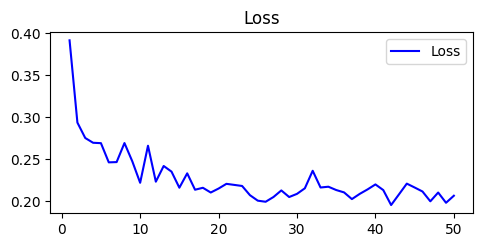

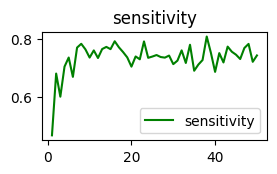

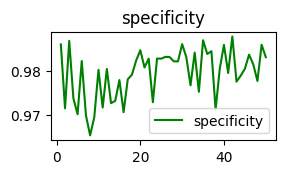

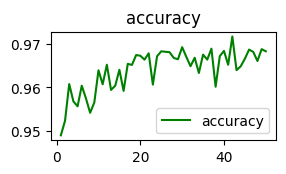

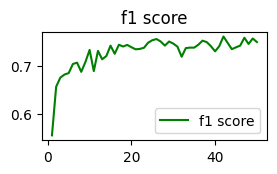

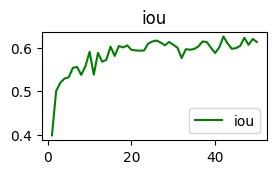

<Figure size 640x480 with 0 Axes>

In [6]:
metrics.plot_test_evaluation_result(loss, sen, spe, acc ,f1, iou)